<a href="https://colab.research.google.com/github/subramanya4shenoy/MachineLearningNbs/blob/main/kaggle/Playground_S01E01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() # Upload your kaggle.json here

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle competitions download -c 'tabular-playground-series-jan-2021'

tabular-playground-series-jan-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip "tabular-playground-series-jan-2021"

Archive:  tabular-playground-series-jan-2021.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### 🟢 Importing requiered pyton libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 🟢 Reading the data

In [ ]:
# reading the train and test data and storing it in panda data frames
train_df = pd.read_csv('train.csv', index_col='id') #for training
test_df = pd.read_csv('test.csv', index_col='id')   #for submission and keeping at aside.

NameError: name 'pd' is not defined

#### 🟢 Observe the data

In [ ]:
# Head, Info, Value count, Describe properties
train_df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   300000 non-null  float64
 1   cont2   300000 non-null  float64
 2   cont3   300000 non-null  float64
 3   cont4   300000 non-null  float64
 4   cont5   300000 non-null  float64
 5   cont6   300000 non-null  float64
 6   cont7   300000 non-null  float64
 7   cont8   300000 non-null  float64
 8   cont9   300000 non-null  float64
 9   cont10  300000 non-null  float64
 10  cont11  300000 non-null  float64
 11  cont12  300000 non-null  float64
 12  cont13  300000 non-null  float64
 13  cont14  300000 non-null  float64
 14  target  300000 non-null  float64
dtypes: float64(15)
memory usage: 36.6 MB


In [ ]:
#value_count is not needed all are numeric values

In [ ]:
train_df.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


#### 🟡 Obeservation from the data

1.   14 features, 1 target to predict, 1 id column
2.   300000, records are given, all are numeric and no missing values
3.   Some column have negative value, all values reside below 1.x



#### 🟢 Visualizing the data

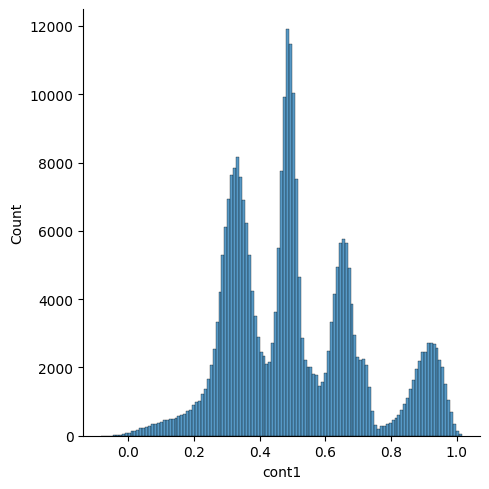

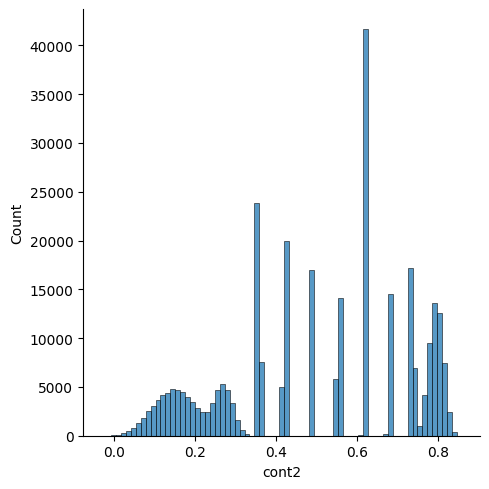

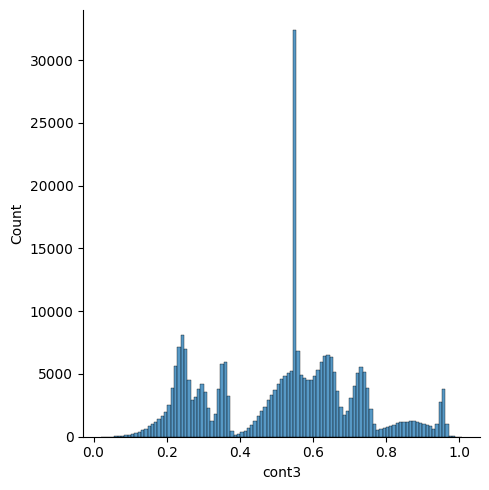

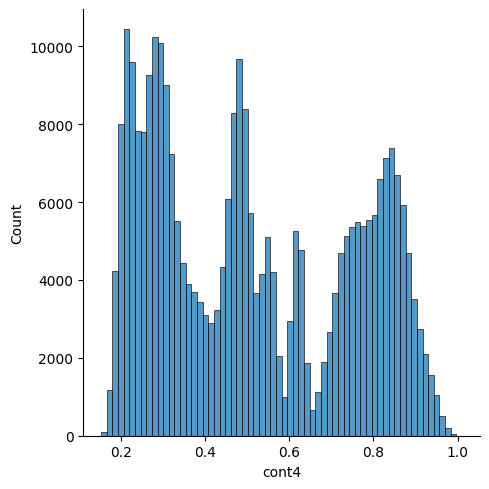

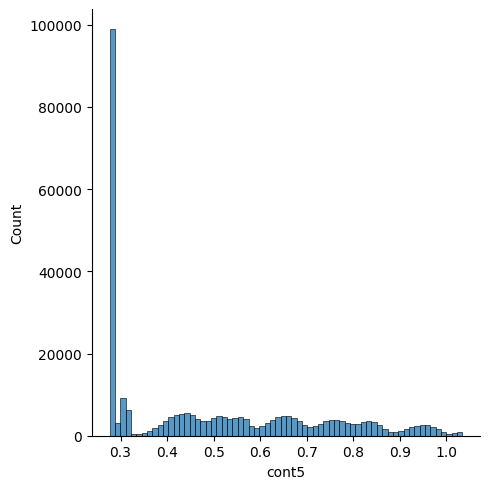

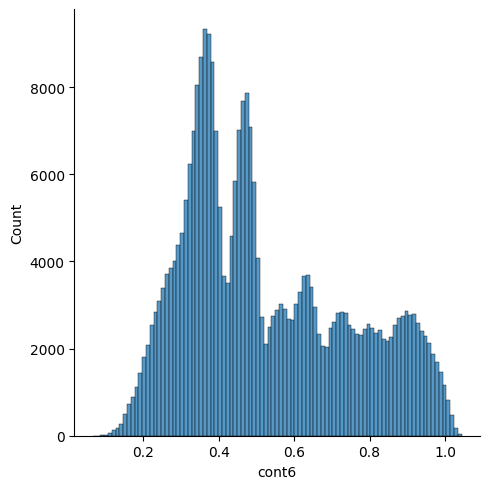

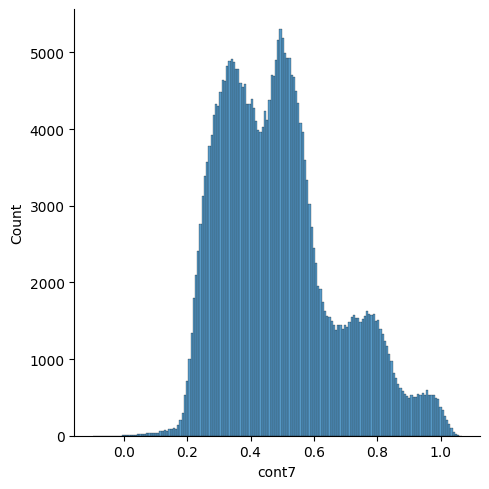

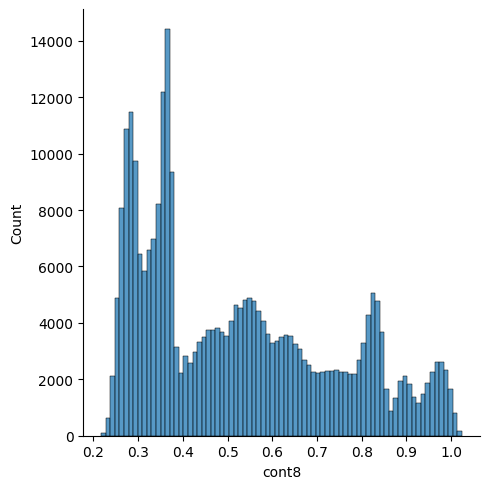

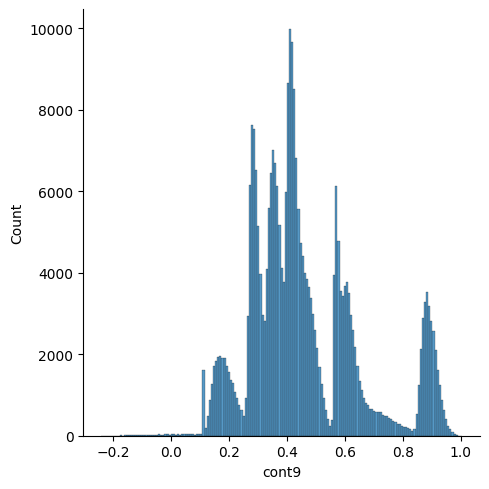

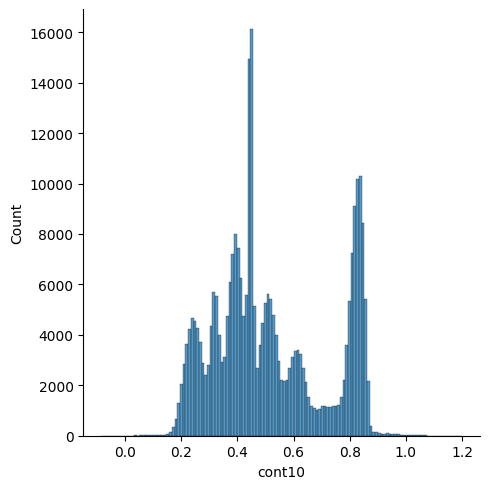

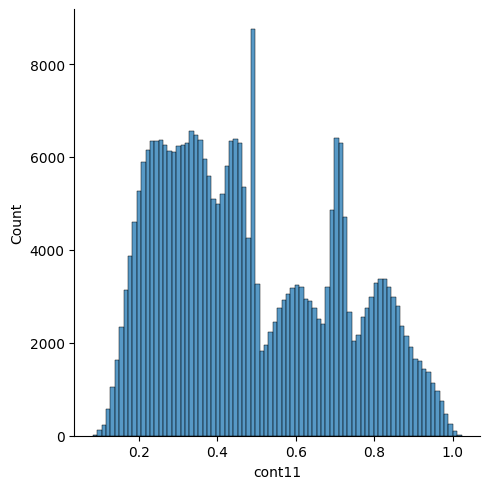

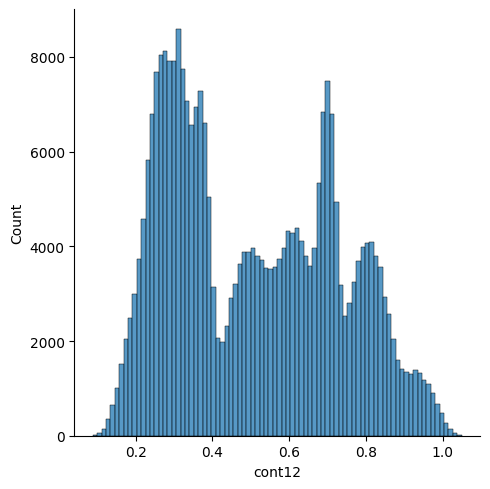

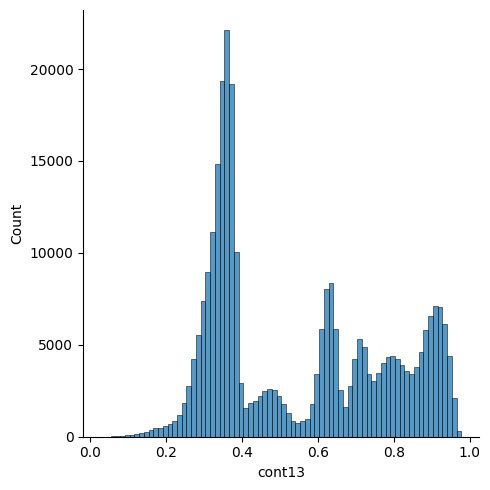

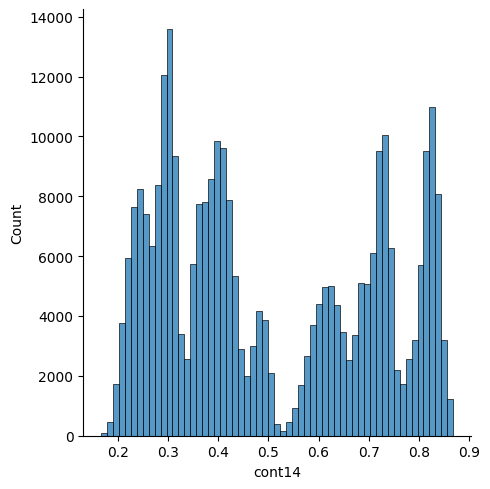

In [ ]:
for i in range(1,15):
  sns.displot(train_df["cont"+str(i)])
  plt.show()

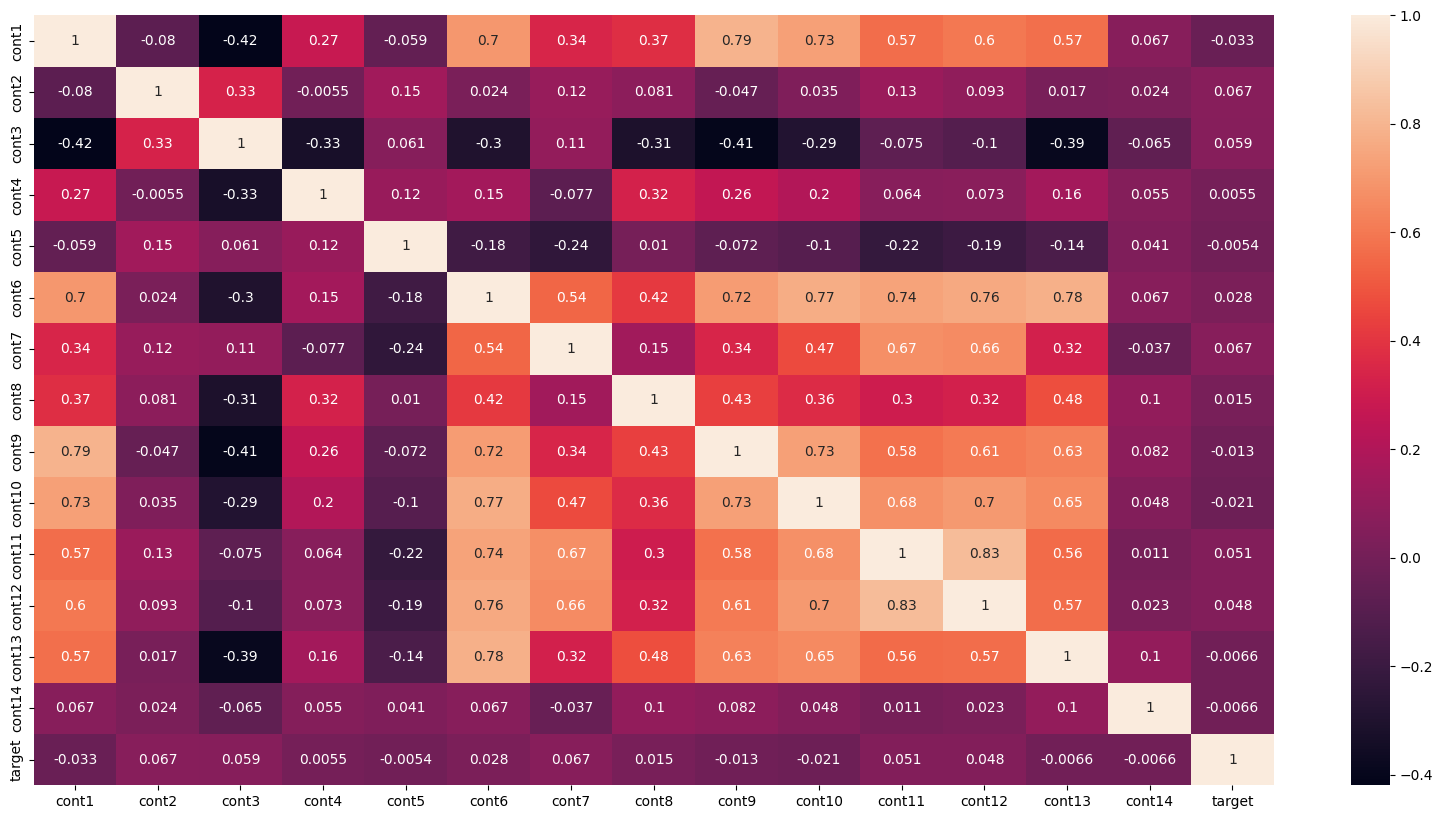

In [ ]:
# Checking corelation with heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True)
plt.show()


#### 🟡 Obeservation from the Visualization
1.   All values sit inside (-1 to 1).
2.   Looking at the corelation we see that the 1,4,5,6,8,9,10,13,14  have close to 0 corelation with target, its a strong candidates to be rejected.



In [ ]:
# common function to compute the corr columns
def compute_correlation(df):
  rejectable_col = [1,4,5,6,8,9,10,13,14]
  for i in rejectable_col:
    df.drop("cont"+str(i), axis=1)
  return df

##**⛳ Attempt 1**

Trying the simplest model with very basic model. from the initial call we will not be removeing the non corelated columns and trainging the model. We will check how the model is performing against the 10% set.

In [ ]:
# importing ML models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### 🟡 Preprocessing the train set

In [ ]:
train_df_x = train_df.drop(columns=['target'])  # Features (all columns except 'target_column')
train_df_y = train_df['target']

X, train_df_10_X, y, train_df_10_y = train_test_split(train_df_x, train_df_y, test_size=0.1, random_state=42)

#### 🟡 Training the model with train_df

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

#### 🟡 Predicting our model with train_df_10 for accuracy

In [ ]:
y_pred = lr_model.predict(train_df_10_X)

#### 🟡 Checking the accuracy of our model

In [ ]:
print("Accuracy of the model: ", np.sqrt(mean_squared_error(train_df_10_y, y_pred)))

Accuracy of the model:  0.7223190382709082


##**⛳ Attempt 2**

Trying the gradientdecent and Linear regression model, without much hyperparam tuning



In [ ]:
# importing ML models from sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

#### 🟡 Preprocessing the train set

In [ ]:
train_df_x = train_df.drop(columns=['target'])  # Features (all columns except 'target_column')
train_df_y = train_df['target']

X, train_df_10_X, y, train_df_10_y = train_test_split(train_df_x, train_df_y, test_size=0.1, random_state=42)

#### 🟡 Training the model with train_df

In [ ]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_regressor.fit(X, y)

SGDRegressor(penalty=None, random_state=42)

#### 🟡 Predicting our model with train_df_10 for accuracy

In [ ]:
y_pred = sgd_regressor.predict(train_df_10_X)

#### 🟡 Checking the accuracy of our model

In [ ]:
mse = mean_squared_error(train_df_10_y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5219768450030279


#### Result
Model has performed well, trying to generate the values for the test and check the score

In [ ]:
test_predictions = sgd_regressor.predict(test_df)

# Creating a DataFrame for submission
submission_df = pd.DataFrame({'id': test_df.index, 'target': test_predictions})

# Saving the submission to a CSV file
submission_df.to_csv('submission.csv', index=False)


### SCORE : 0.71
Not so great score as this 0.61 was the best score.
model looks performing well with train set but bad with test set. I believe it might be a case of overfitting.

I will be trying to remove non corelated columns and reduce noise and give it another try.

##**⛳ Attempt 3**

Trying the gradientdecent and Linear regression model, with non coleaniear columns

In [ ]:
# importing ML models from sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

#### 🟡 Preprocessing the train set

In [ ]:
train_df_x = train_df.drop(columns=['target'])  # Features (all columns except 'target_column')
train_df_y = train_df['target']

X, train_df_10_X, y, train_df_10_y = train_test_split(train_df_x, train_df_y, test_size=0.1, random_state=42)

#### 🟡 Training the model with train_df + preprocessing

In [ ]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)

#Preprocessing
X = compute_correlation(X)

sgd_regressor.fit(X, y)

SGDRegressor(penalty=None, random_state=42)

#### 🟡 Predicting our model with train_df_10 for accuracy

In [ ]:
# Preprocessing
train_df_10_X = compute_correlation(train_df_10_X)

y_pred = sgd_regressor.predict(train_df_10_X)

#### 🟡 Checking the accuracy of our model

In [ ]:
mse = mean_squared_error(train_df_10_y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5219768450030279


In [ ]:
#Preprocessing
computed_test_df = compute_correlation(test_df)

test_predictions = sgd_regressor.predict(computed_test_df)

# Creating a DataFrame for submission
submission_df = pd.DataFrame({'id': test_df.index, 'target': test_predictions})

# Saving the submission to a CSV file
submission_df.to_csv('submission.csv', index=False)

##**⛳ Attempt 4**
Trying the GD with GridSearchCV and trying to tune the hyper param


In [ ]:
# Importing gridsearcgCV
from sklearn.model_selection import GridSearchCV

#### 🟡 Preprocessing the train set

In [ ]:
train_df_x = train_df.drop(columns=['target'])  # Features (all columns except 'target_column')
train_df_y = train_df['target']

X, train_df_10_X, y, train_df_10_y = train_test_split(train_df_x, train_df_y, test_size=0.1, random_state=42)

NameError: name 'train_df' is not defined

#### 🟡 Trying some combination of Hyperparameters for Gradient decent

In [ ]:
# Example parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['adaptive'],
    'eta0': [0.01],
    'max_iter': [1000],
    'penalty': ['l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')


NameError: name 'GridSearchCV' is not defined

#### 🟡 Training the model with train_df + preprocessing + Tuning some hyperparams

In [ ]:
# Fit the model
grid_search.fit(X, y)